# Modify chip options

When creating a new design using Qiskit Metal, a default set of information related to the chip is specified. This includes chip size, which defines the active simulation area in the electromagnetic simulator of your choice. 

In this notebook we will see how to access and change some of these chip-related specifications to allow you the flexibility of designing your custom quantum chip. We will start by drawing a simple planar design, and then we will play around with chip parameters to highlight the different features accessible through the API.

For convenience, let's begin by enabling [automatic reloading of modules](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) when they change.

In [1]:
%load_ext autoreload
%autoreload 2

Now, let's import Qiskit Metal:

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

Let us draw our simple planar design: 

In [3]:
design = designs.DesignPlanar()

In [4]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

In [5]:
# Create a new qcomponent object with name 'Q1' 
q1 = TransmonPocket(design, 'Q1')

Now that we have defined a simple planar design, we can use the following commands to access the dictionary keys to locate a chip and then access the chip-related parameters avaialble to be modified:

In [6]:
design.chips.keys()

dict_keys(['main'])

In [7]:
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

Here, we can see there are four different parameters available for us to change:
- Material
- Layer_start
- Layer_end
- Size

If you want to change your wafer material from silicon to germanium, for example, you can run the following code block: 

In [8]:
design.chips.main.material = ['germanium']
design.rebuild()

Now, if we check our chip parameters again, we will see a different item under material. Let's try it out!

In [9]:
design.chips.main

{'material': ['germanium'],
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

We now know how to modify the arguments related to the chip. The most common parameter we may find ourselves dealing with is the chip size. Once we have an idea about our experimental design, choosing a chip size that allows us sufficent space to place all the components as desired is important. Here are the different parameters related to the chip size. 

In [10]:
design.chips.main.size

{'center_x': '0.0mm',
 'center_y': '0.0mm',
 'center_z': '0.0mm',
 'size_x': '9mm',
 'size_y': '6mm',
 'size_z': '-750um',
 'sample_holder_top': '890um',
 'sample_holder_bottom': '1650um'}

The parameters 'sample_holder_top' and 'sample_holder_bottom' are placeholders for parameters that specify the top and bottom coordinates of the 'vacuum box' in a multilevel system. The other parameters are self-explanatory. 

Now, let us play around with chip-size and export these files to GDS to look at the effects of our commands. 

In [11]:
# We will begin by resetting the wafer material to silicon

design.chips.main.material = ['silicon']
design.rebuild()

# We will then export the current file to a GDS file
a_gds = design.renderers.gds
a_gds.options['path_filename'] = '../../resources/Fake_Junctions.GDS'

design.renderers.gds.export_to_gds("Before_size_change.gds")

1

Now we will change the size of the chip in x and y dimensions, and then export it as a second GDS file. This can be done as follows:

In [12]:
design.chips.main.size['size_x'] = '15mm'
design.chips.main.size['size_y'] = '10mm'
design.rebuild()

In [13]:
design.renderers.gds.export_to_gds("After_size_x_y_change.gds")

1

We will now move the center of the chip and see the effect it has on the qubit design. We will export this change as a third GDS file.

In [14]:
# First we will rest to the original settings

design.chips.main.size['size_x'] = '9mm'
design.chips.main.size['size_y'] = '6mm'

# Next we will shift the center of the chip

design.chips.main.size['center_x'] = '4.5mm'
design.chips.main.size['center_y'] = '2mm'
design.rebuild()

# We next export it to GDS

design.renderers.gds.export_to_gds("After_center_x_y_change.gds")

09:22AM 24s WARNING [_cheese_buffer_maker]: The bounding box for no-cheese is outside of chip size.
Bounding box for chip is (0.0, -1.0, 9.0, 5.0).
Bounding box with no_cheese buffer is (-0.35000000000000003, -0.35000000000000003, 0.35000000000000003, 0.35000000000000003).


1

Now is a good time to take a look at the three GDS files we have created so far. In our previous run we intentionally centered the chip such that the entire device is not on the chip. This triggers a warning and enables you to make a correction. 

This warning is triggered by no-cheese check which is always 'ON' by default for the 'main' chip and for level '1'. Cheesing is the process of adding flux holes to the wafer to allow access to the ground plane. So, no_cheese is the “keep-out” region on the chip where the holes would not be implemented. If you have a multiple chip device, this option needs to be modified to match your configuration. We will see how to access and change this setting below. We first look at the GDS rendering options.

In [15]:
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

We notice the dictionary called 'cheese' and 'no_cheese' above. We are interested in the 'view_in_file' option. We show how to access this option below. For a multilayer device, each chip and layer needs to be set to 'True'. If this 'view_in_file' check is 'False', we will not see the warning message we saw above. Let us try it out!

In [16]:
a_gds.options.no_cheese['view_in_file']['main']={1: False}
a_gds.options.cheese['view_in_file']['main']={1: False}

Now when we export to GDS, we do not see a warning message.

In [17]:
design.renderers.gds.export_to_gds("After_center_x_y_change_no_warning.gds")

1

Next, we revert back the 'cheese' and 'no_cheese' dictionaries and overwrite our last GDS with a modified one so that the device is within the chip.

In [18]:
# Restore a_gds options

a_gds.options.no_cheese['view_in_file']['main']={1: True}
a_gds.options.cheese['view_in_file']['main']={1: True}

# We will shift the center of the chip to origin

design.chips.main.size['center_x'] = '0mm'
design.chips.main.size['center_y'] = '0mm'
design.rebuild()

# We next export it to GDS

design.renderers.gds.export_to_gds("After_reverting_x_y_change.gds")

1

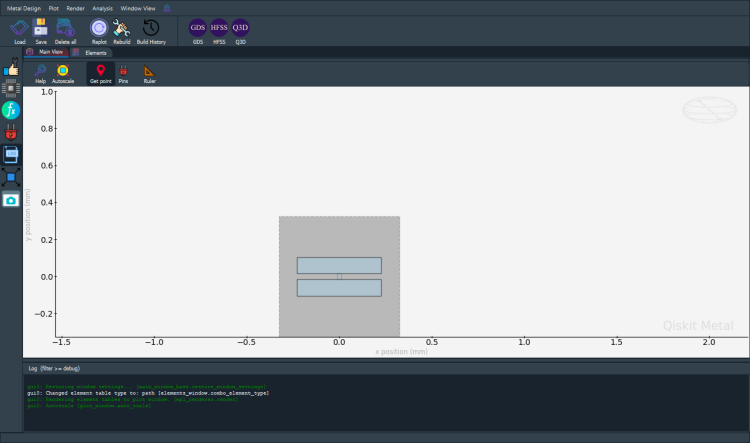

In [19]:
from qiskit_metal import MetalGUI
gui = MetalGUI(design)
gui.autoscale()
gui.screenshot()

You have now restored the chip to its original configuration!